In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#Check for duplicate value
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

# EDA (Exploratary data analysis)

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [18]:
import matplotlib.pyplot as plt

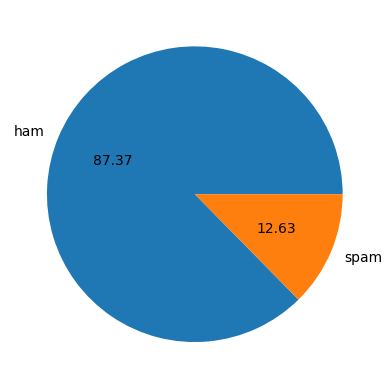

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
# Data is imbalanced

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk

In [23]:
df['     num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# No. of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target']==0][['     num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df['target']==1][['     num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns


<Axes: xlabel='     num_characters', ylabel='Count'>

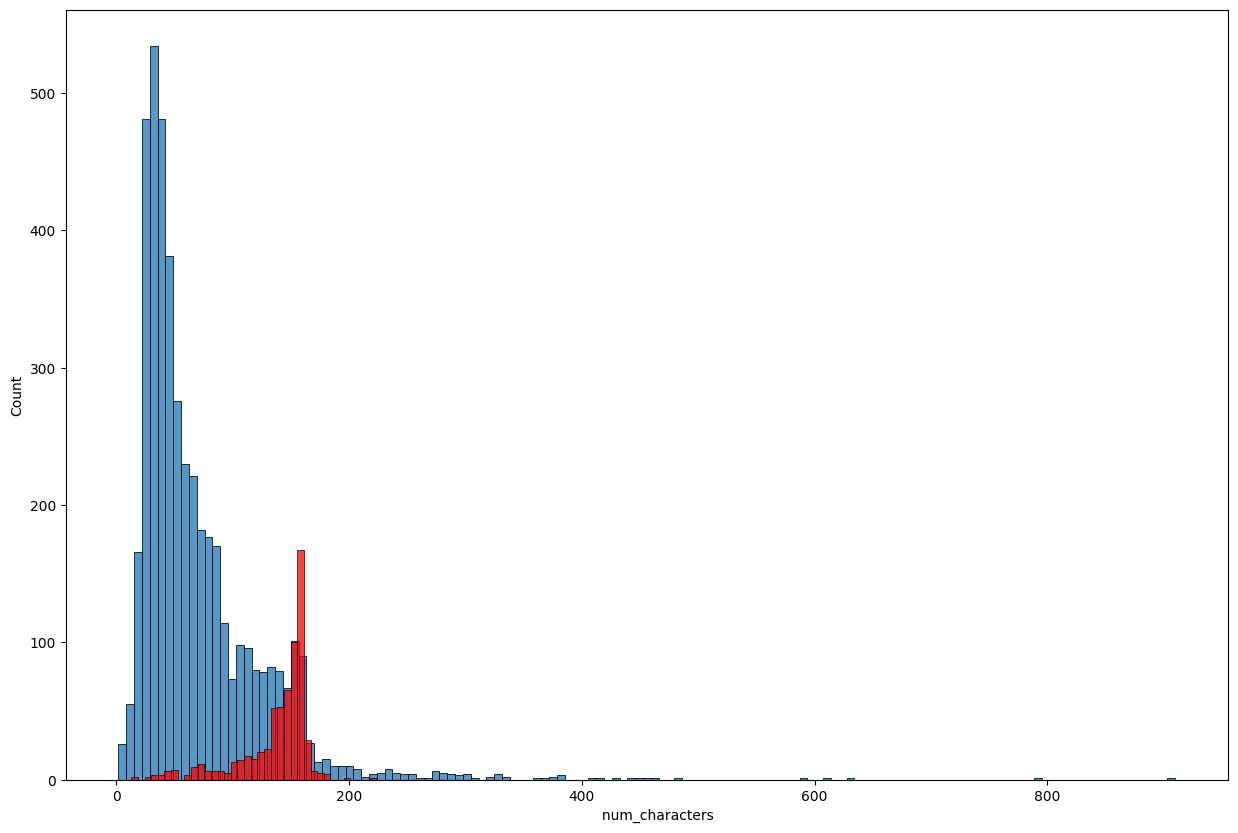

In [33]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['     num_characters'])
sns.histplot(df[df['target']==1]['     num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

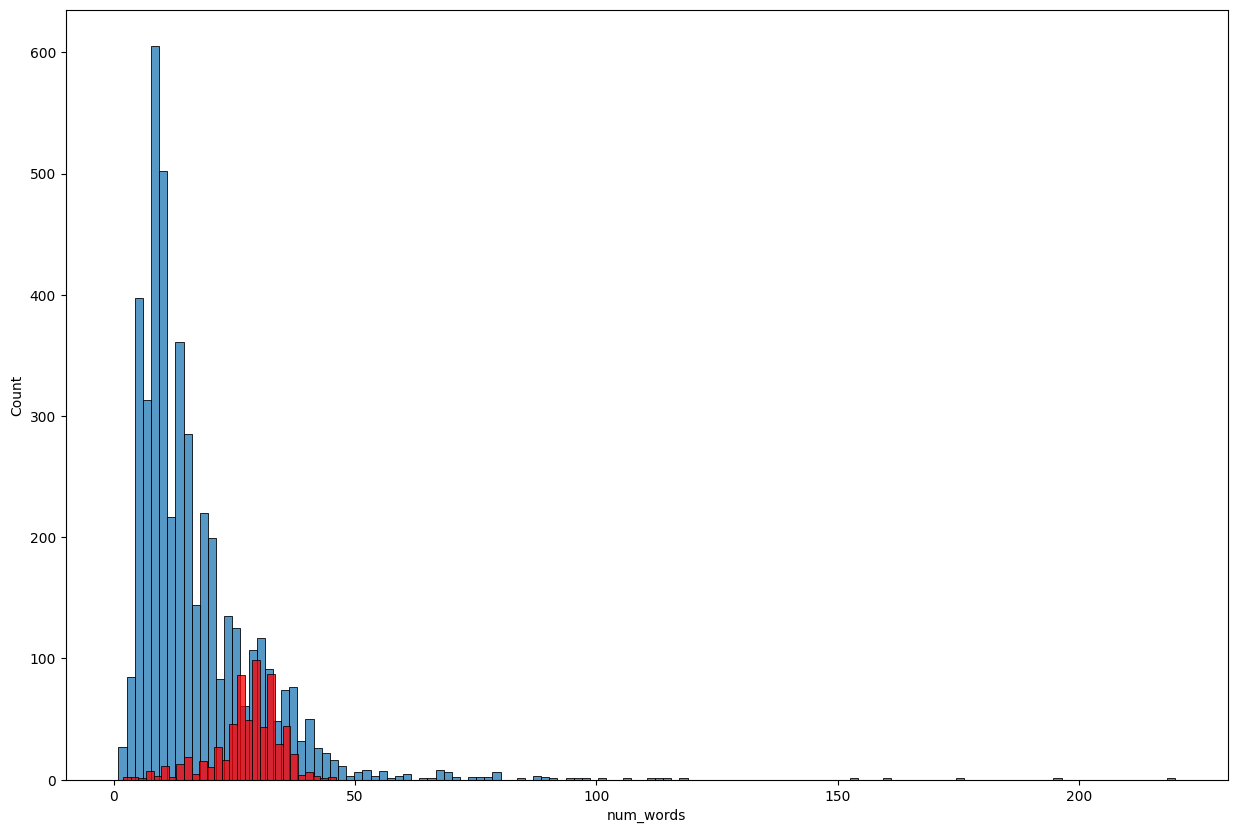

In [34]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

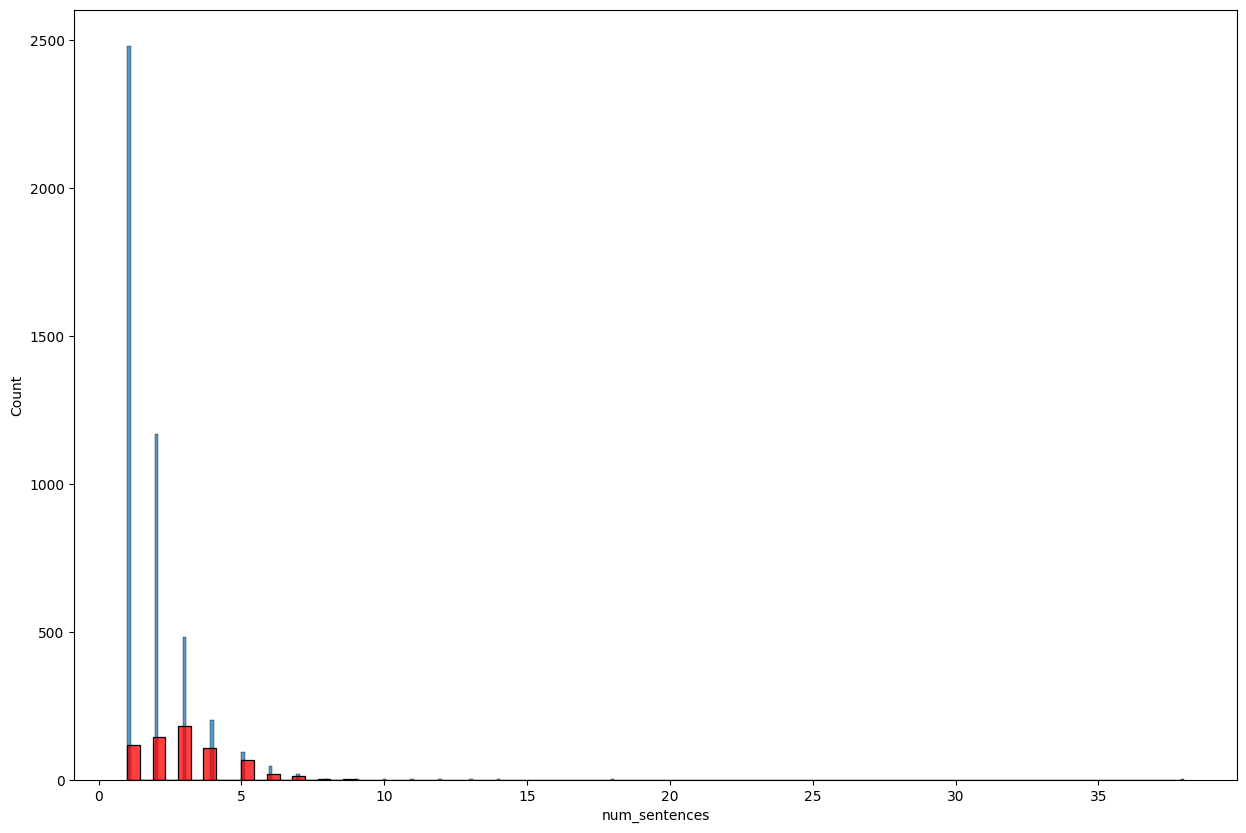

In [35]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

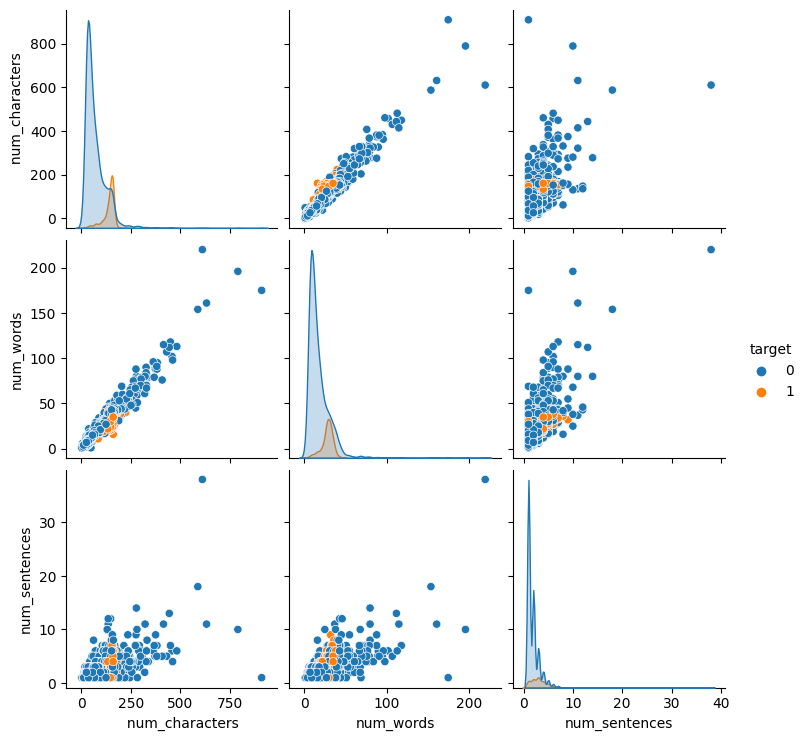

In [36]:
sns.pairplot(df,hue='target')

C:\Users\asus\AppData\Local\Temp\ipykernel_19476\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

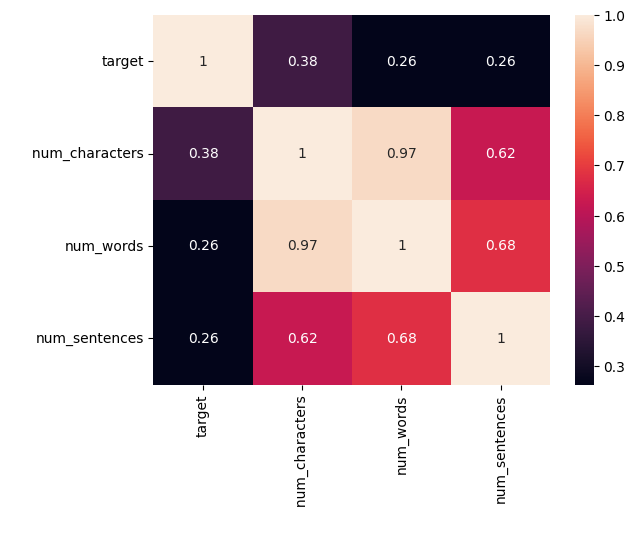

In [37]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing

In [38]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Steaming

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [43]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [44]:
transform_text("hii how are you ? vivek")

'hii vivek'

In [45]:
transform_text("did you like my persentation on ML ?")

'like persent ml'

In [46]:
transform_text("I loved the YT lectures on Machine Learning. How about you ?")

'love yt lectur machin learn'

In [47]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [48]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [49]:
df['transformed_text']=df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [52]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=5, background_color='white')

In [53]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

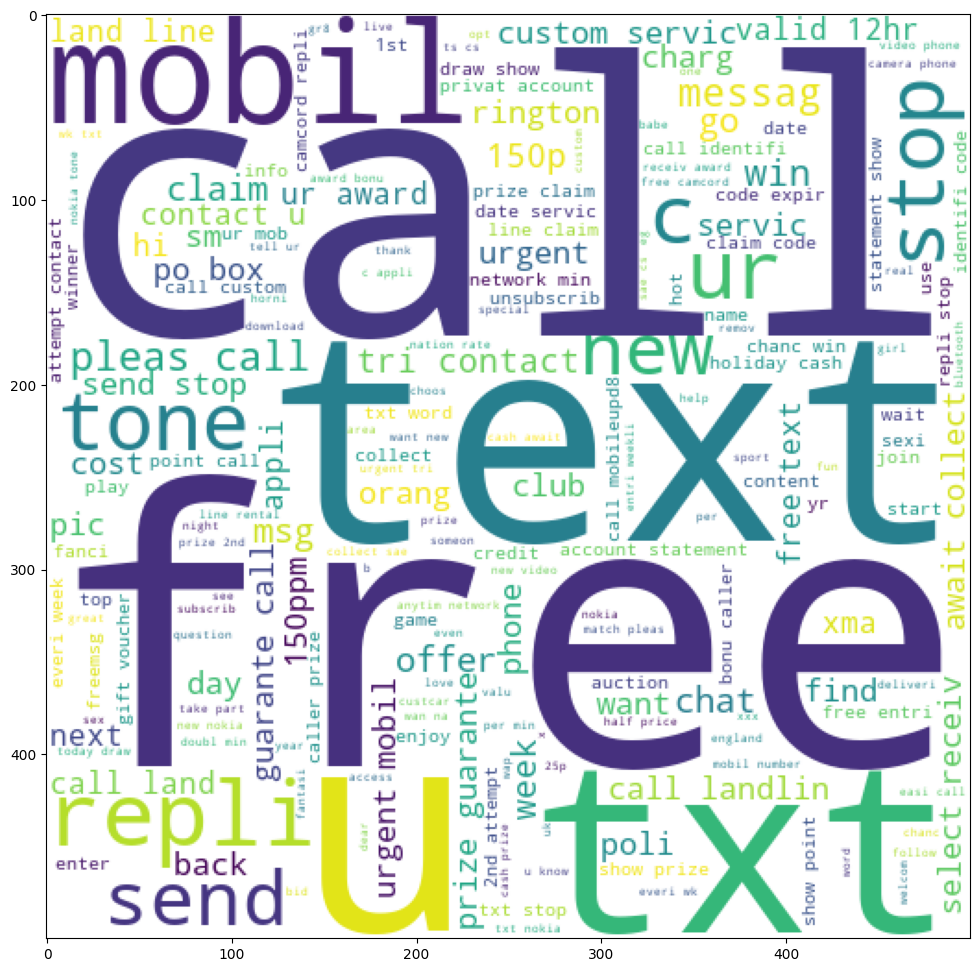

In [54]:
plt.figure(figsize=(12,12))
plt.imshow(spam_wc)

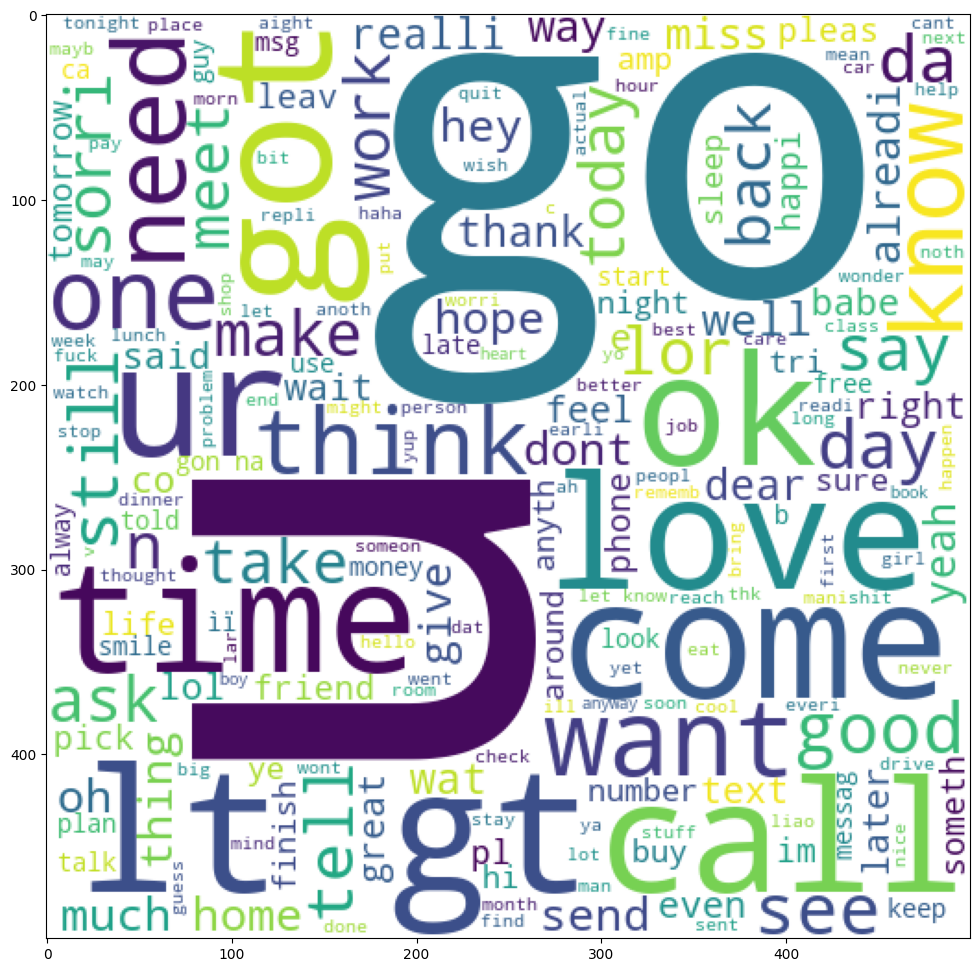

In [55]:
ham_wc=spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,12))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
#     print(msg)
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [59]:
from collections import Counter
(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [60]:
(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

0     320
1     191
2     155
3     141
4     122
5     119
6     119
7     114
8     104
9     103
10     98
11     97
12     82
13     74
14     64
15     64
16     63
17     60
18     57
19     57
20     56
21     55
22     52
23     51
24     51
25     49
26     48
27     45
28     45
29     45
Name: 1, dtype: int64

In [61]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
#     print(msg)
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35404

In [63]:
len(spam_corpus)

9939

In [64]:
(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

0         u
1        go
2       get
3        gt
4        lt
5         2
6      come
7       got
8      know
9      like
10     call
11     time
12       ok
13     love
14     good
15     want
16       ur
17      day
18     need
19      one
20      lor
21        4
22     home
23    think
24      see
25     take
26    still
27       da
28     tell
29     make
Name: 0, dtype: object

In [65]:
(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

0     883
1     404
2     349
3     288
4     287
5     284
6     275
7     236
8     236
9     234
10    233
11    219
12    217
13    216
14    213
15    208
16    197
17    190
18    170
19    165
20    159
21    156
22    152
23    149
24    147
25    143
26    143
27    142
28    133
29    129
Name: 1, dtype: int64

# Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [67]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [68]:
x.shape

(5169, 6708)

In [69]:
y=df['target'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [74]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [75]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [76]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [77]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [78]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
y=df['target'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [80]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [81]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [82]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [83]:
# tfidf ->> mnd is best b/c precision score =1

In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [86]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [87]:
clfs={'svc':svc,
     'KN':knc,
     'NB':mnb,
     'DT':dtc,
     'LR':lrc,
     'RF':rfc,
     'AdaBoost':abc,
     'BgC':bc,
     'ETC':etc,
     'GBDT':gbdt,
     'Xgb':xgb}

In [88]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
print(train_classifier(svc,x_train,y_train,x_test,y_test))

(0.9729206963249516, 0.9741379310344828)


In [90]:
print(train_classifier(knc,x_train,y_train,x_test,y_test))

(0.9003868471953579, 1.0)


In [91]:
acc_score=[]
pre_score=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For - " , name)
    print("Accuracy - " , current_accuracy)
    print('Precision - ' , current_precision)
    
    acc_score.append(current_accuracy)
    pre_score.append(current_precision)

For -  svc
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For -  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For -  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For -  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For -  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For -  RF
Accuracy -  0.971953578336557
Precision -  1.0
For -  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For -  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For -  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For -  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For -  Xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [102]:
performance_df=pd.DataFrame((clfs.keys(),acc_score,pre_score))

In [103]:
performance_df=performance_df.T

In [104]:
performance_df

,0,1,2
0,svc,0.972921,0.974138
1,KN,0.900387,1.0
2,NB,0.959381,1.0
3,DT,0.935203,0.838095
4,LR,0.951644,0.94
5,RF,0.971954,1.0
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GBDT,0.952611,0.92381


In [96]:
columns = ['Algorithm', 'Accuracy', 'Precision']

In [105]:
performance_df.columns=['Algorithm', 'Accuracy', 'Precision']

In [106]:
performance_df

,Algorithm,Accuracy,Precision
0,svc,0.972921,0.974138
1,KN,0.900387,1.0
2,NB,0.959381,1.0
3,DT,0.935203,0.838095
4,LR,0.951644,0.94
5,RF,0.971954,1.0
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GBDT,0.952611,0.92381


In [107]:
performance_df = performance_df.sort_values(by='Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.0
2,NB,0.959381,1.0
5,RF,0.971954,1.0
8,ETC,0.972921,0.982456
0,svc,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,Xgb,0.972921,0.943548
4,LR,0.951644,0.94
9,GBDT,0.952611,0.92381
7,BgC,0.958414,0.862595


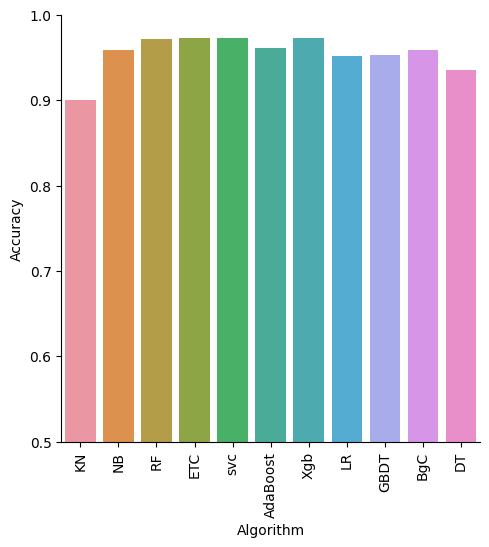

In [108]:
sns.catplot(x='Algorithm',y='Accuracy',
           data=performance_df,kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

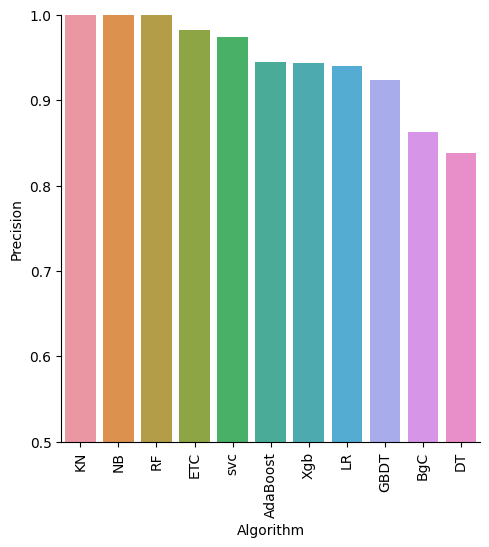

In [109]:
sns.catplot(x='Algorithm',y='Precision',
           data=performance_df,kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [119]:
# Model Improvement
'''1. Change the max_features parameter of tfidf
   2. Scale the value of x using min-max scaler
      scaler=MinMaxScaler()
      x=scaler.fit_transform(x)
   3. appending the  num_characters col to x
      x=np.hstack((x,df['num_charaters'].values_reshape(-1,1)))
      x.shape
   4. Voting classifier
      svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
      mnb=MultinomialNB()
      etc=ExtraTreesClassifier(n_estimator=50,random_state=2)
      from sklearn.ensemble import VotingClassifier
      voting=VotingClassifier(estimator=[('svm',svc),('nb',mnb),('et',etc),voting='soft'])
      voting.fit(x_train,y_train)
      y_pred=voting.predict(x_test)
      print("Accuracy",accuracy_score(y_test,y_pred))
      print("Precision",precision_score(y_test,y_pred))
  5.  Applying stacking
      estimator=[('svc'svc),('nb',mnb),('et',etc)]
      final_estimator=RandomForestClassifier()
      from sklearn.ensemble import StackingClassifier
      clf=StackingClassifier(estimators=estimators,fianl_estimator=final_estiamtor)
      clf.fit(x_train,y_train)
      y_pred=clf.predict(x_test)
      print("Accuracy",accuracy_score(y_test,y_pred))
      print("Precision",precision_score(y_test,y_pred))
      '''

'1. Change the max_features parameter of tfidf\n   2. Scale the value of x using min-max scaler\n      scaler=MinMaxScaler()\n      x=scaler.fit_transform(x)\n   3. appending the  num_characters col to x\n      x=np.hstack((x,df[\'num_charaters\'].values_reshape(-1,1)))\n      x.shape\n   4. Voting classifier\n      svc=SVC(kernel=\'sigmoid\',gamma=1.0,probability=True)\n      mnb=MultinomialNB()\n      etc=ExtraTreesClassifier(n_estimator=50,random_state=2)\n      from sklearn.ensemble import VotingClassifier\n      voting=VotingClassifier(estimator=[(\'svm\',svc),(\'nb\',mnb),(\'et\',etc),voting=\'soft\'])\n      voting.fit(x_train,y_train)\n      y_pred=voting.predict(x_test)\n      print("Accuracy",accuracy_score(y_test,y_pred))\n      print("Precision",precision_score(y_test,y_pred))\n  5.  Applying stacking\n      estimator=[(\'svc\'svc),(\'nb\',mnb),(\'et\',etc)]\n      final_estimator=RandomForestClassifier()\n      from sklearn.ensemble import StackingClassifier\n      clf=Sta

In [121]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))